<a href="https://colab.research.google.com/github/cris9005/MSDS411-2023/blob/main/MARTINEZ_Assignment_2_411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Methodology:

We will perform data analysis. The act of examining data using analytical or statistical methods to identify meaningful information is known as data analysis. After analyzing the data, we will find out the distribution of the data and the types of data.

We will teach the clustering algorithm to separate. We will also compare the clusters at the end. We try to fully use EDA in this project.

Exploratory Data Analysis (EDA) is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations.

Algorithms:

-KMeans
- GMM
- Hierarchical

In [ ]:
# Import Libraries
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.neural_network
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import tensorflow.keras.backend as k

from keras import models
from keras import layers

In [ ]:
# Import additional libraries
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [ ]:
# Upload the data file
df1 = pd.read_csv('/content/Melbourne_housing_FULL.csv', header=0)
# R code:: alldata = read.csv("Melbourne_housing_FULL.csv",header=0)


# EDA
Look at data and normalize missing features


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df1.isnull().sum().sort_values(ascending = False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
CouncilArea          3
Propertycount        3
Postcode             1
Distance             1
Address              0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Suburb               0
dtype: int64

In [ ]:
df_copy = df1.copy()
df_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


<ipython-input-8-3d73ad657e7e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


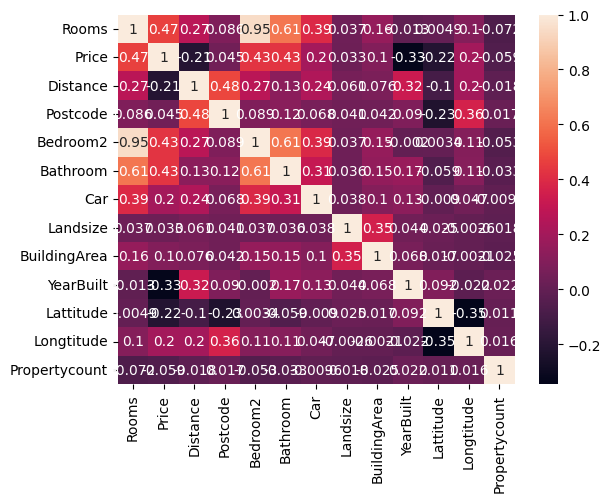

In [ ]:
import seaborn as sn

corr_matrix = df1.corr()
sn.heatmap(corr_matrix, annot=True);
plt.show();

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
# Drop NaN
#houses1 = df1.dropna(axis='columns', inplace = True)
houses_data = df_copy.dropna()


In [ ]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

In [ ]:
houses_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [ ]:
#GOAL: Identify types of houses (so Type could help reaffirm this)
#INSIGHT: help marketing activities
#INSIGHT: help assign territories to realtors
#INSIGHT: appraise the valeu of properties for sale
#INSIGHT: ID properties that are undervalued compared to similar properties

workdata =  houses_data[["Rooms","Price",
                        "Distance","Bedroom2",
                        "Bathroom","Car",
                        "Landsize","BuildingArea",
                        "YearBuilt"]]

In [ ]:
#len(df1['Suburb'].unique()) #351
workdata['Rooms'].value_counts().sort_values(ascending = False)


3     3824
4     2240
2     1912
5      507
1      340
6       51
7        7
8        4
10       1
12       1
Name: Rooms, dtype: int64

In [ ]:
workdata['Price'].value_counts().sort_values(ascending = False)


600000.0     85
1300000.0    75
650000.0     70
1100000.0    66
800000.0     65
             ..
1408000.0     1
503750.0      1
570500.0      1
1899000.0     1
1605500.0     1
Name: Price, Length: 1846, dtype: int64

In [ ]:
workdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         8887 non-null   int64  
 1   Price         8887 non-null   float64
 2   Distance      8887 non-null   float64
 3   Bedroom2      8887 non-null   float64
 4   Bathroom      8887 non-null   float64
 5   Car           8887 non-null   float64
 6   Landsize      8887 non-null   float64
 7   BuildingArea  8887 non-null   float64
 8   YearBuilt     8887 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 694.3 KB


# Correlation Matrix
Instead of correlation value, reasonability is important.
Some correlations : Tyler Vigen
np.corrcoef() is much more faster than df.corr() for high volume of data
High correlation features are bad for all machine learning models

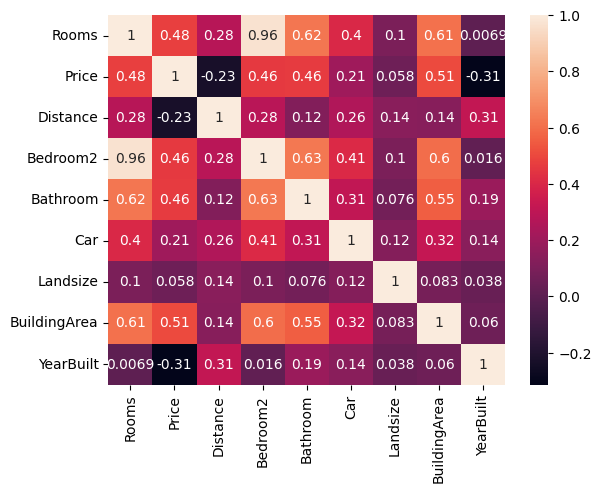

In [ ]:

corr_matrix2 = workdata.corr()
sn.heatmap(corr_matrix2, annot=True);
plt.show();

In [ ]:
fig = px.bar(corr_matrix2['Landsize'], orientation='h')
fig.show()

In [ ]:
workdata.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348
std,0.963786,6.793819e+05,6.813402,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000
25%,2.000000,6.410000e+05,6.400000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000
75%,4.000000,1.345000e+06,13.900000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000
max,12.000000,9.000000e+06,47.400000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000


# Normalize Data
Ensure that a common scale is employed for all variables prior to input to cluster analysis
Justify your choice of scale and any data transformations performed

Have observations on a 0 to 1 scale works well for unsupervised learning

We want to perform PCA on the data and reduce the dimensions, so we need standardization.

There are three methods:
1- Standard Scaler
2- MinMax Scaler
3- normalization

The best standardization method for our data is minmax scaler because standardscaler is suitable for data with standard distribution, but we observed that our data was not like this. Also, because our data has outliers, we do not use normalization because this method is very sensitive to outliers.


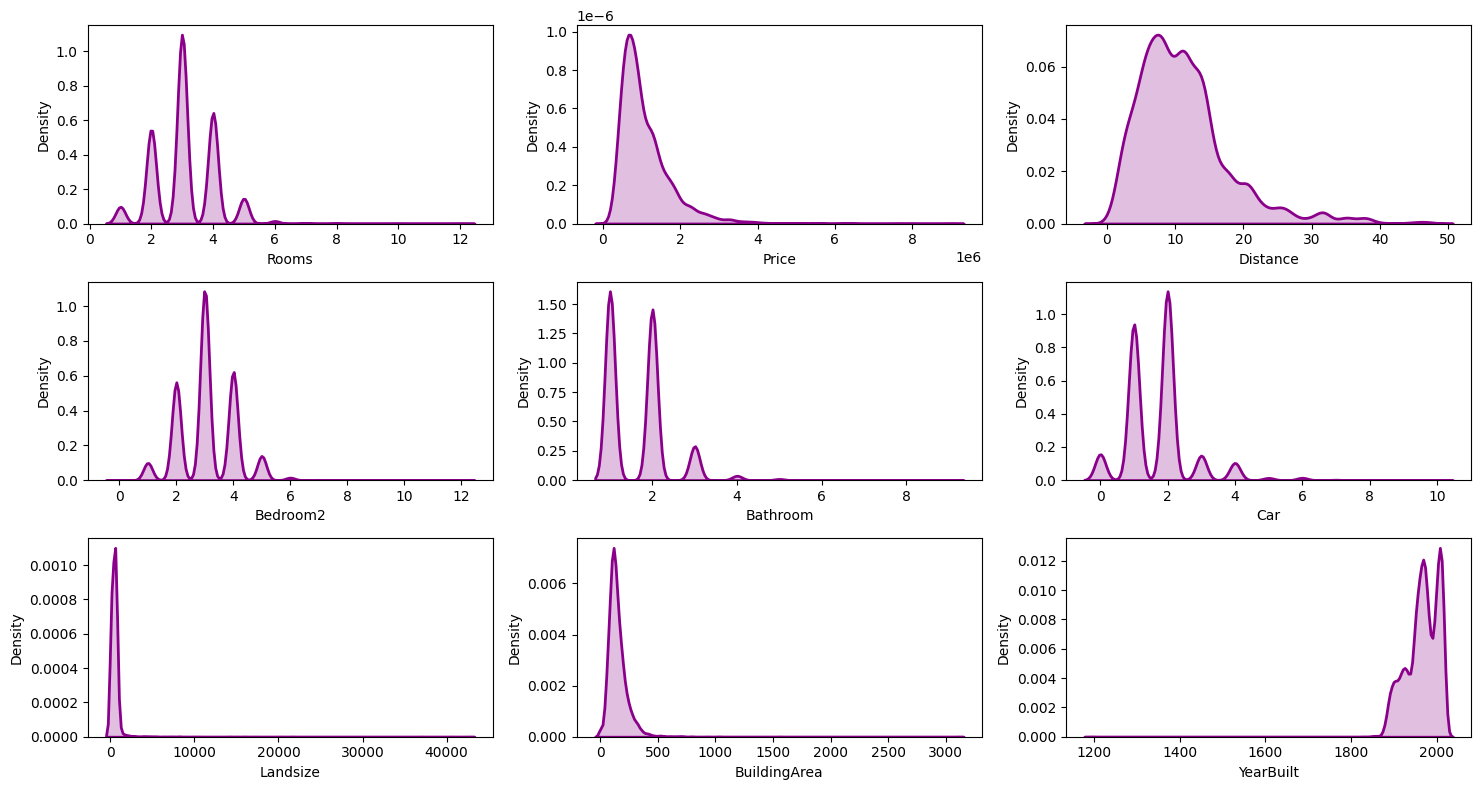

In [ ]:
plt.figure(1 , figsize = (15 , 8))

n = 0
for x in ["Rooms","Price",
                        "Distance","Bedroom2",
                        "Bathroom","Car",
                        "Landsize","BuildingArea",
                        "YearBuilt"]:

    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.kdeplot(x=workdata[x], data=workdata ,fill=True, linewidth=2, color='darkmagenta')


plt.tight_layout()
plt.show()

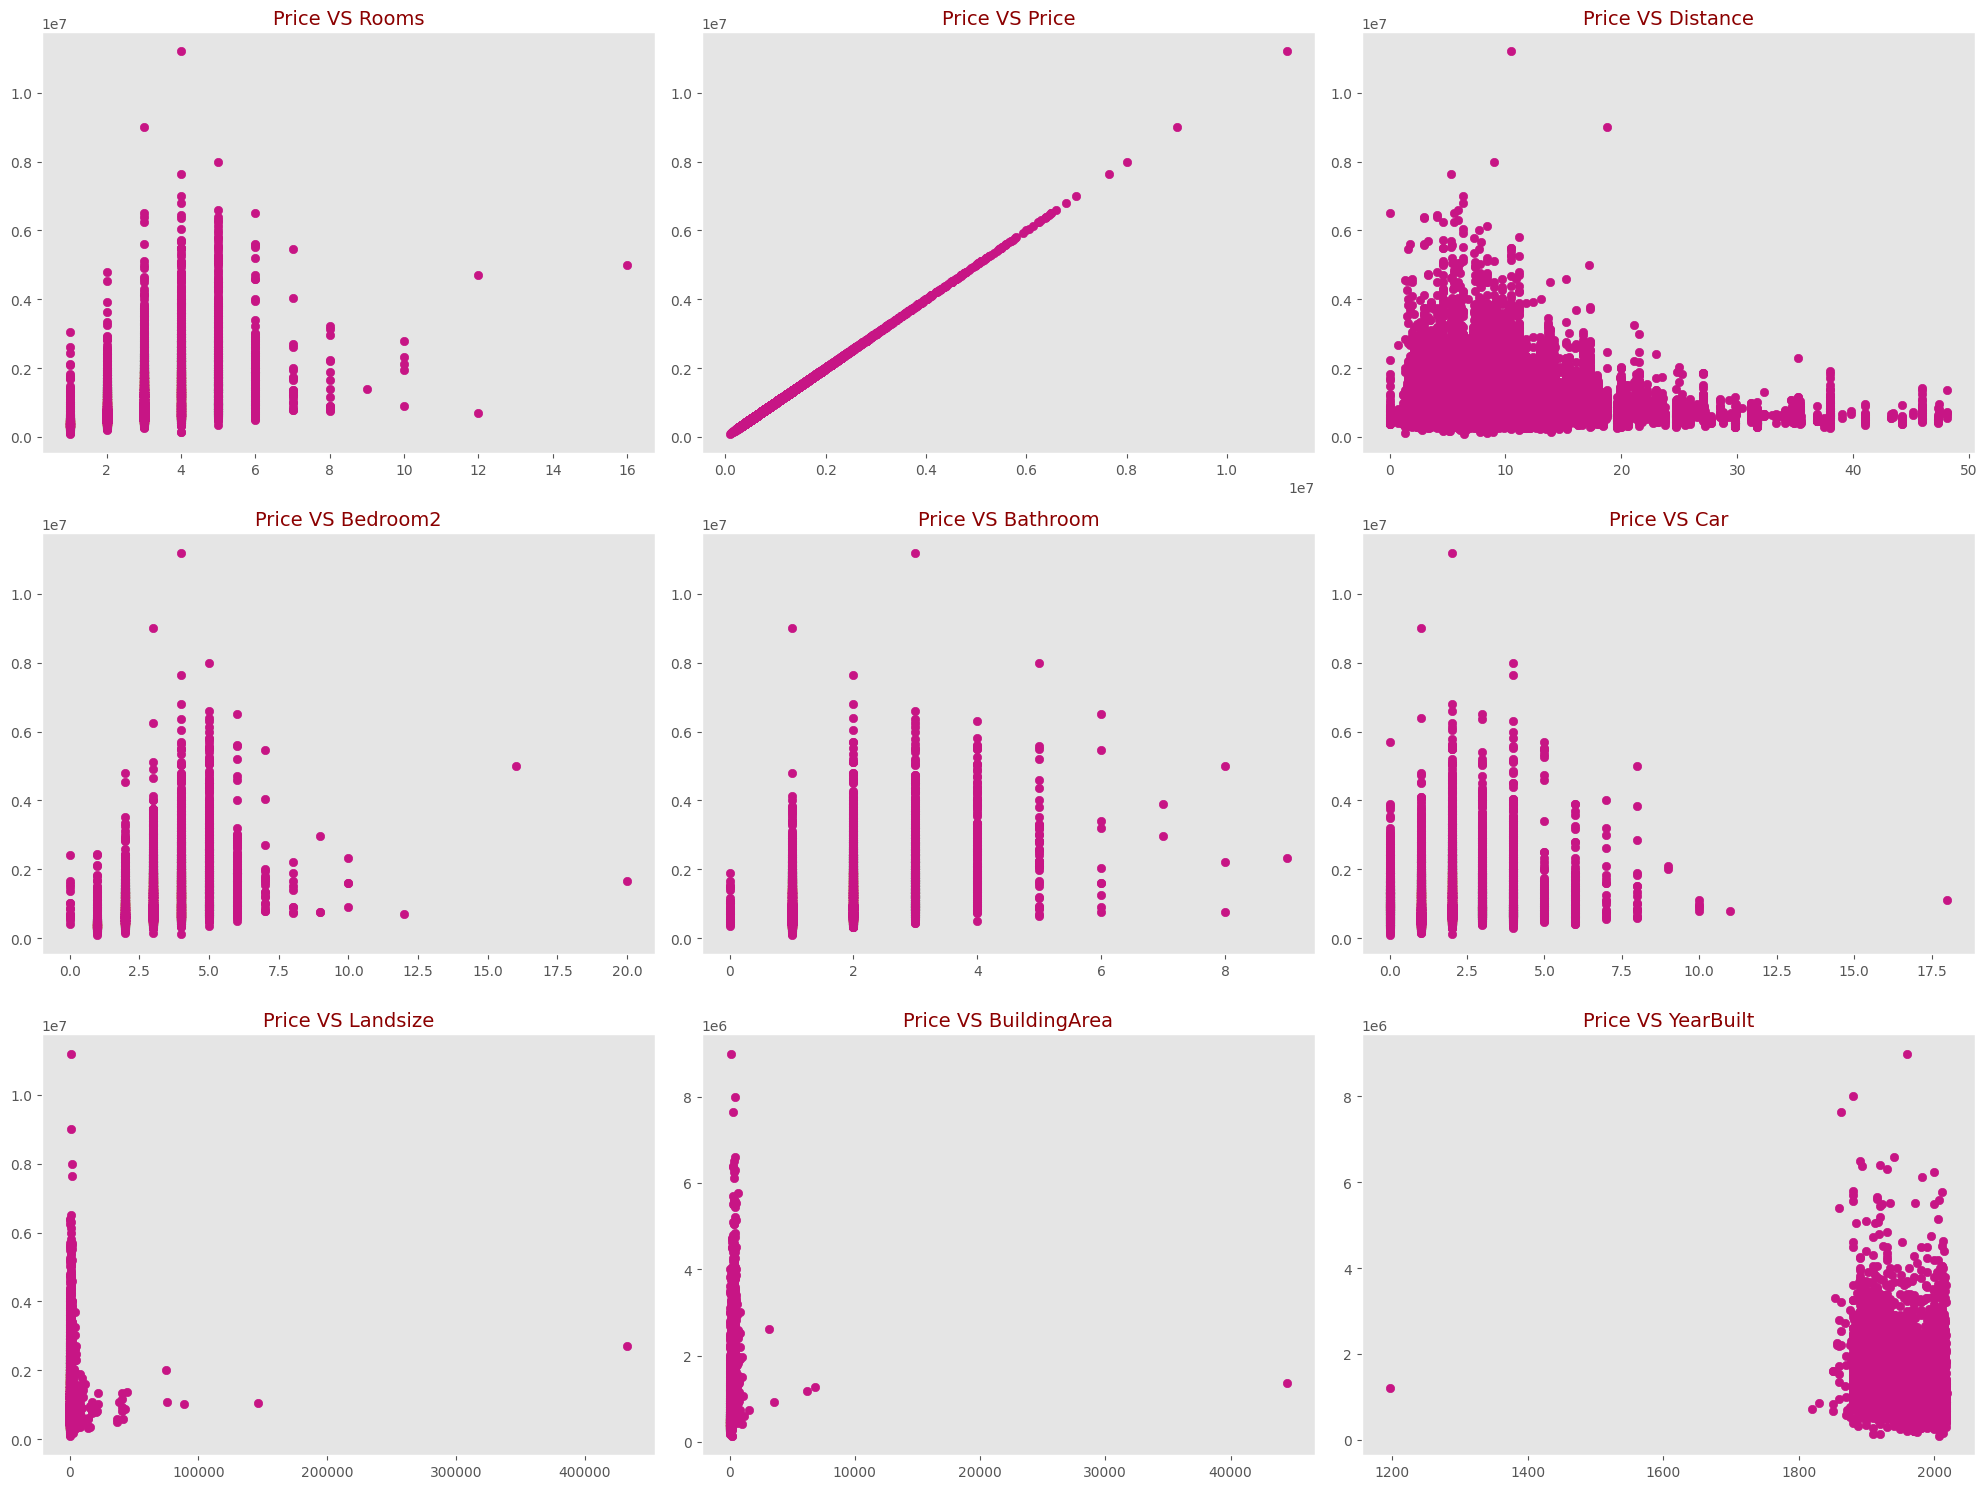

In [ ]:
plt.figure(1 , figsize = (20 , 15))
n = 0
for x in ["Rooms","Price",
                        "Distance","Bedroom2",
                        "Bathroom","Car",
                        "Landsize","BuildingArea",
                        "YearBuilt"]:

    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    plt.scatter(df1[x], df1['Price'], color = 'mediumvioletred')
    plt.title('Price VS {}'.format(x), fontsize = 14, color = 'darkred')
    plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler


In [ ]:
X = workdata
y = houses_data['Type']

In [ ]:
nrm = Normalizer()
nrm.fit(workdata)
normal_data = nrm.transform(workdata)

In [ ]:
# Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

In [ ]:
#X_encoded = pd.get_dummies(workdata,drop_first=True)
#X_encoded.columns
# workdata[['rooms','price','method','distance','bathroom','regionname']]
# all numeric

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt'],
      dtype='object')

#PCA
- Linear Dimensionality Reduction Tool
- Performs better with normalized and scaled data
- Good for low-dimensional linear relational data
- Stucks at non linear relational data
- Can be used for extremely fast and easy image recognition
- Number of components is unknown.
- Generally %80 - %90 explained variance ratio is good

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns = workdata.columns)
X_scaled.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0.090909,0.101928,0.052743,0.166667,0.000,0.0,0.003645,0.025386,0.855407
1,0.181818,0.150412,0.052743,0.250000,0.125,0.0,0.003131,0.048201,0.855407
2,0.272727,0.165633,0.052743,0.250000,0.000,0.2,0.002804,0.045630,0.993925
3,0.181818,0.196753,0.052743,0.333333,0.125,0.0,0.005724,0.067481,0.867558
4,0.090909,0.169692,0.052743,0.166667,0.000,0.2,0.005981,0.034383,0.843256


In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

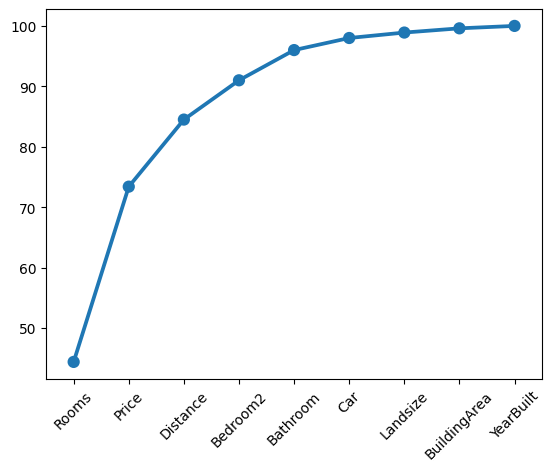

In [ ]:
pca = PCA(n_components = X_scaled.shape[1]).fit(X_scaled) # 9 components
cumratio = np.round(100 * pca.explained_variance_ratio_.cumsum(),1)
sns.pointplot(x=X_scaled.columns.values,y=cumratio)
plt.xticks(rotation=45)
plt.show()

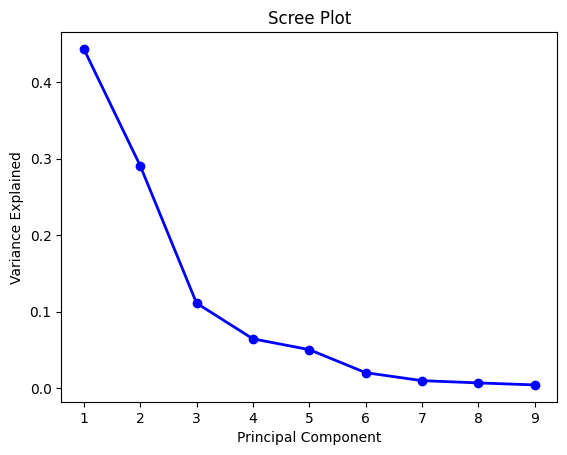

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca.fit(X_scaled)
data_pca1 = pca.transform(X_scaled)
data_pca1 = pd.DataFrame(data_pca,columns=X.columns)
data_pca1.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,-0.289551,0.020829,-0.079019,-0.032486,0.022893,0.042461,-0.000130,0.003305,0.002548
1,-0.171555,0.140496,-0.142246,0.002733,0.014336,0.054601,-0.001586,0.004510,0.002432
2,-0.094444,0.144589,0.054538,-0.068661,-0.055030,-0.102378,-0.008187,-0.010148,-0.059360
3,-0.131911,0.184373,-0.160518,-0.026234,0.019855,0.023224,-0.000677,0.006964,0.065093
4,-0.212510,0.078330,0.100722,-0.050719,0.077019,0.041122,-0.003690,0.002446,0.002796


In [ ]:
#The amount of variance that each PC explains
var3= pca.explained_variance_ratio_
print(var3)

[0.4435089  0.29077374 0.1109778  0.06427564 0.05018193 0.02003269
 0.00961248 0.00662981 0.004007  ]


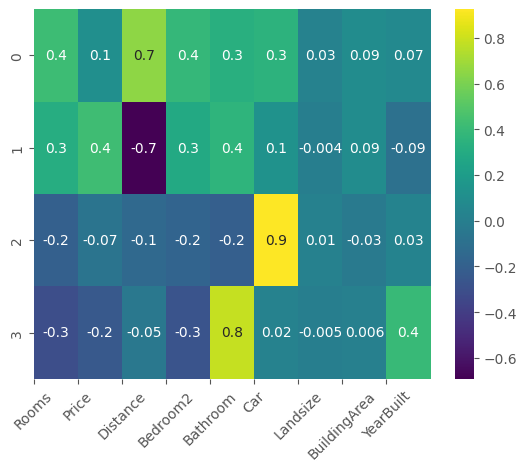

In [ ]:
pca = PCA(n_components = 4)
pca.fit(X_scaled)
data_pca = pca.transform(X_scaled)
sns.heatmap(pca.components_,cmap='viridis',annot=True,fmt='.1g')
plt.xticks(range(len(X.columns)),X.columns,rotation=45)
plt.show()

In [ ]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)

[0.4435089  0.29077374 0.1109778  0.06427564]


We can see:

- The first principal component explains 44% of the total variation in the dataset.
- The second principal component explains 29% of the total variation.
- The third principal component explains 12% of the total variation.
- The fourth principal component explains 6.4% of the total variation.

Note that the percentages sum to 100%.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)
fig = px.scatter(components, x=0, y=1, color=houses_data['Type'])
fig.show()

In [ ]:
pca.fit(X_scaled)
data_pca = pca.transform(X_scaled)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-0.289551,0.020829,-0.079019
1,-0.171555,0.140496,-0.142246
2,-0.094444,0.144589,0.054538
3,-0.131911,0.184373,-0.160518
4,-0.212510,0.078330,0.100722


Looks like  components are enough to describe 80% of the variance in the dataset
We'll choose 3 components for our modeling

# TSNE and UMAP
- Graph based nonlinear feature elimination tool.
- Used for visualization of data in 2d or 3d dimensions.
- Calculate distance based on distance to neighbors.
- UMAP is used in Google Streets
- TSNE Parameters : Perplexity (btw 10 - 50) and learning rate (btw 10 - 200) are main hyper parameters
- UMAP Parameters : number of neighbors (low means local, high means global importance)

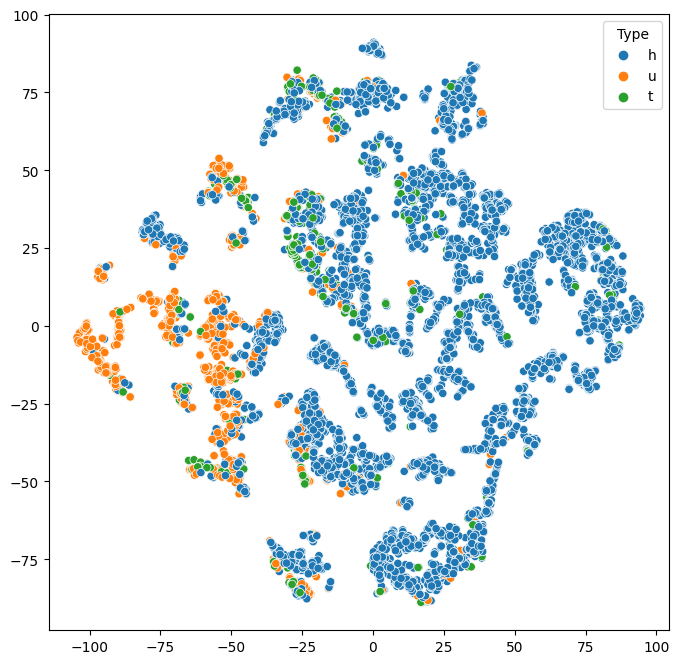

In [ ]:
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import fcluster

tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(X_scaled)
plt.figure(figsize=(8,8))
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1], hue=houses_data['Type']);

In [ ]:
px.box(X_scaled, x=houses_data.Type, y='Price', color=houses_data.Type,
       title='Distribution of Type by Landsize continents')

#Clustering Model #1
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method. find the point where the decrease in inertia begins to slow. K=4 is the “elbow” of this graph.

In [ ]:
!pip install --upgrade kneed

In [ ]:
from kneed import DataGenerator, KneeLocator


In [ ]:
%matplotlib inline
import plotly.express as px
from matplotlib import colors
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score , calinski_harabasz_score, davies_bouldin_score

In [ ]:
def metrics2(data_pca, model):  # for gmm + mbkmeans

    silhouette_avg = silhouette_score(data_pca, model.predict(data_pca))
    calinski_score_avg = calinski_harabasz_score(data_pca,model.predict(data_pca))
    davies_bouldin_Score_avg = davies_bouldin_score(data_pca, model.predict(data_pca))

    df_metrics = pd.DataFrame({'Metrics':['silhouette score','calinski_harabasz score','davies_bouldin score'],
                           'Score':[silhouette_avg,calinski_score_avg,davies_bouldin_Score_avg]

                           }).style.set_properties(**{'text-align': 'right'},**{'background-color': 'darkmagenta'},
                                   **{'color': 'white'})
    return df_metrics

In [ ]:
def metrics1(data_pca, model):  # for kmeans + DBSCAN + hierarchical

    silhouette_avg = silhouette_score(data_pca, model.labels_)
    calinski_score_avg = calinski_harabasz_score(data_pca, model.labels_)
    davies_bouldin_Score_avg = davies_bouldin_score(data_pca, model.labels_)

    df_metrics = pd.DataFrame({'Metrics':['silhouette score','calinski_harabasz score','davies_bouldin score'],
                           'Score':[silhouette_avg,calinski_score_avg,davies_bouldin_Score_avg]

                           }).style.set_properties(**{'text-align': 'right'},**{'background-color': 'darkmagenta'},
                                   **{'color': 'white'})
    return df_metrics

- k hyperparameter : It defines the number of clusters or groups the data is to be divided into. For the selection of values of k, we use 2 statistical tests :
1. Elbow Method : It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k is the value that resembles an elbow is selected. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.
2. Silhouette Score Method : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the k value with highest score is selected for modeling.

In [ ]:
kmean_set = {"init":"random", "n_init":10,"max_iter":300,"random_state":42}

In [ ]:
inertia = []

for k in range(1,7) :
    kmeans = KMeans(n_clusters=k, **kmean_set)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.style.use('default')

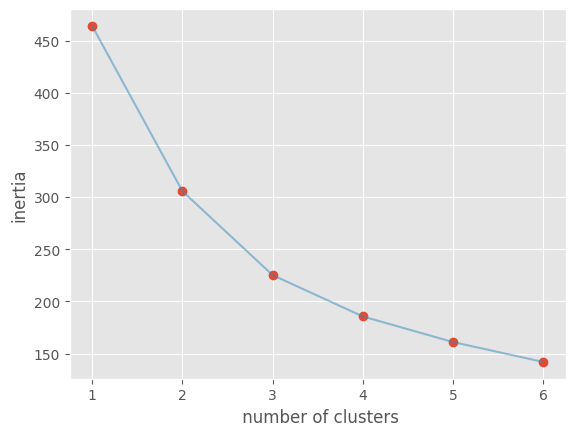

In [ ]:
plt.style.use("ggplot")
plt.plot(range(1,7), inertia ,'o')
plt.plot(range(1,7), inertia ,'-' , alpha = 0.5)
plt.xticks(range(1,7))
plt.xlabel(" number of clusters")
plt.ylabel("inertia")
plt.show()

In [ ]:
kl = KneeLocator(range(1,7), inertia , curve="convex", direction="decreasing")
kl.elbow

3

 - best number of cluster is 3

In [ ]:
kmeans = KMeans(n_clusters=3 , **kmean_set)
kmeans.fit(data_pca)

metrics1(data_pca, kmeans)

,Metrics,Score
0,silhouette score,0.341417
1,calinski_harabasz score,4707.772077
2,davies_bouldin score,1.062767


MODEL 2(GMM)

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state=2048, covariance_type="full")
gmm.fit(data_pca)

metrics2(data_pca, gmm)

,Metrics,Score
0,silhouette score,0.306851
1,calinski_harabasz score,2936.540104
2,davies_bouldin score,1.340968


MODEL 3 Hierarchical cluster analysis
- HCA is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.


1. Agglomerative Hierarchical Clustering
2. Divisive Hierarchical Clustering


In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='average').fit(data_pca)

 # linkage= ‘ward’, ‘complete’, ‘average’, ‘single’

metrics1(data_pca, hierarchical)

,Metrics,Score
0,silhouette score,0.647558
1,calinski_harabasz score,46.951169
2,davies_bouldin score,0.514266


#MODEL 4 DBSCAN Clustering i
- a density based clustering algorithm that is used for unsupervised learning problems.

In a bid to eliminate the problems of K-Means Clustering with nested data and high-dimensional data, DBSCAN Clustering eliminates it!


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

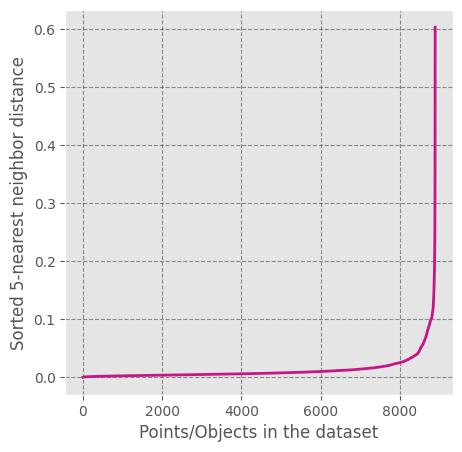

In [ ]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(data_pca)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(data_pca)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(5,5))
    plt.plot(distances , color = 'mediumvioletred', linewidth=2)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * data_pca.shape[-1] - 1    # k=2*{dim(dataset)} - 1
get_kdist_plot(X=data_pca, k=k)

In [ ]:
db = DBSCAN(eps=0.08 , min_samples=6).fit(data_pca)

metrics1(data_pca, db)

,Metrics,Score
0,silhouette score,0.002468
1,calinski_harabasz score,257.741233
2,davies_bouldin score,1.895270


# Compare Models

In [ ]:
labels_h = hierarchical.fit_predict((data_pca))
labels_k = kmeans.fit_predict((data_pca))
labels_g = gmm.fit_predict(data_pca)
labels_d = db.fit_predict(data_pca)

In [ ]:
Campare_Models = pd.DataFrame({'Model_Name':['KMeans', 'GMM','Heirarichicaal', 'DBSCAN'],
                           'silhouette score':['0.34', '0.31', '0.65', '.002'],
                           'calinski_harabasz score':['4707.77', '2936.54', '46.95', '257.74'],
                           'davies_bouldin score':['1.06', '1.34', '0.51', '1.89']
                           })

Campare_Models.style.set_properties(**{'text-align': 'center'},**{'background-color': 'mediumvioletred'},
                                   **{'color': 'white'})

,Model_Name,silhouette score,calinski_harabasz score,davies_bouldin score
0,KMeans,0.34,4707.77,1.06
1,GMM,0.31,2936.54,1.34
2,Heirarichicaal,0.65,46.95,0.51
3,DBSCAN,.002,257.74,1.89


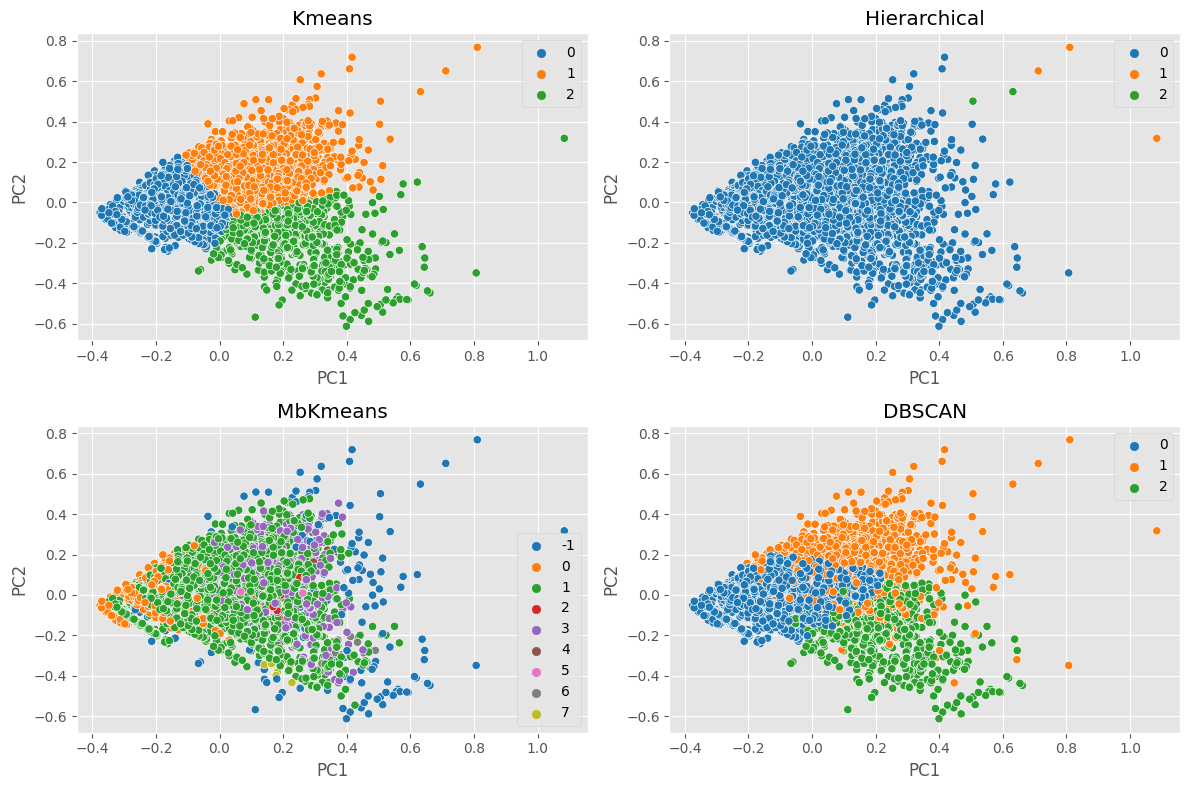

In [ ]:
fig , axs = plt.subplots(nrows = 2, ncols = 2 ,figsize=(12,8))

axs = axs.flatten()

sns.scatterplot(data=workdata, x=data_pca['PC1'], y=data_pca['PC2'],
                    hue=labels_k, palette='tab10', markers=True,  legend='auto',ax = axs[0]).set(title='Kmeans')

sns.scatterplot(data=workdata, x=data_pca['PC1'], y=data_pca['PC2'],
                    hue=labels_h, palette='tab10', markers=True,  legend='auto',ax = axs[1]).set(title='Hierarchical')

sns.scatterplot(data=workdata, x=data_pca['PC1'], y=data_pca['PC2'],
                    hue=labels_d, palette='tab10', markers=True,  legend='auto',ax = axs[2]).set(title='MbKmeans')

sns.scatterplot(data=workdata, x=data_pca['PC1'], y=data_pca['PC2'],
                    hue=labels_g, palette='tab10', markers=True,  legend='auto',ax = axs[3]).set(title='DBSCAN')

plt.tight_layout()
plt.show()

#As you can see, the kmean algorithm did the best separation between the data and this algorithm also got a good score.

In [ ]:
Final_Model = kmeans.labels_

In [ ]:
pd.Series(Final_Model).value_counts()

0    4468
1    3006
2    1413
dtype: int64

In [ ]:
values = [4468, 3006 , 1413]
labels= [0,1,2]

cmap = colors.LinearSegmentedColormap.from_list('darkmagenta', ['darkmagenta', "white"])
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

fig = go.Figure(data=[go.Pie(labels=labels,title='CLUSTERS', title_font=dict(size=25, color='black', family='Calibri')
                ,marker=dict(colors=color_list, line=dict(color='white', width=3)),
                values=values, hole=.4)])

fig.show()

In [ ]:
houses_data["CLUSTERS"] = Final_Model
houses_data.head(8)

<ipython-input-192-372ee82288de>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CLUSTERS
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,0
24,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,3.0,2.0,2.0,214.0,190.0,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0,0
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra City Council,-37.8078,144.9965,Northern Metropolitan,4019.0,0


In [ ]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

In [ ]:
dfn1 = houses_data[houses_data["CLUSTERS"] == 0]
dfn2 = houses_data[houses_data["CLUSTERS"] == 1]
dfn3 = houses_data[houses_data["CLUSTERS"] == 2]

In [ ]:
dfn1.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,4468.0,2.451880,0.659801,1.00000,2.000000,3.000000,3.000000e+00,4.000000e+00
Price,4468.0,870472.716876,409248.111822,131000.00000,575000.000000,784500.000000,1.100000e+06,3.750000e+06
Distance,4468.0,7.982498,3.766130,0.00000,5.200000,7.800000,1.120000e+01,1.790000e+01
Postcode,4468.0,3086.529991,59.584598,3000.00000,3040.000000,3071.000000,3.131250e+03,3.207000e+03
Bedroom2,4468.0,2.431289,0.660692,0.00000,2.000000,2.000000,3.000000e+00,5.000000e+00
Bathroom,4468.0,1.220009,0.418599,1.00000,1.000000,1.000000,1.000000e+00,3.000000e+00
Car,4468.0,1.211952,0.663460,0.00000,1.000000,1.000000,2.000000e+00,4.000000e+00
Landsize,4468.0,415.646822,1049.370894,0.00000,100.750000,249.000000,5.420000e+02,3.700000e+04
BuildingArea,4468.0,106.808507,54.315283,0.00000,80.000000,104.000000,1.270000e+02,1.561000e+03
YearBuilt,4468.0,1960.161146,37.350781,1830.00000,1930.000000,1960.000000,1.995000e+03,2.018000e+03


In [ ]:
dfn1.head(8).style.set_properties(**{'text-align': 'center'},**{'background-color': 'darkgreen'},
                                   **{'color': 'white'}).format(precision=2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CLUSTERS
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,0
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,0
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,0
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,4.00,2.00,0.00,245.00,210.00,1910.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,0
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,2.00,1.00,2.00,256.00,107.00,1890.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,0
18,Abbotsford,10 Valiant St,2,h,1097000.00,S,Biggin,8/10/2016,2.50,3067.00,3.00,1.00,2.00,220.00,75.00,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,0
24,Abbotsford,40 Nicholson St,3,h,1350000.00,VB,Nelson,12/11/2016,2.50,3067.00,3.00,2.00,2.00,214.00,190.00,2005.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,0
25,Abbotsford,123/56 Nicholson St,2,u,750000.00,S,Biggin,12/11/2016,2.50,3067.00,2.00,2.00,1.00,0.00,94.00,2009.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,0


In [ ]:
dfn2.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,3006.0,3.909182e+00,0.735188,2.00000,3.000000,4.000000e+00,4.000000e+00,1.000000e+01
Price,3006.0,1.594863e+06,835574.054055,394000.00000,1000000.000000,1.405000e+06,1.923750e+06,9.000000e+06
Distance,3006.0,1.039195e+01,3.565640,1.20000,7.800000,1.050000e+01,1.350000e+01,2.150000e+01
Postcode,3006.0,3.102600e+03,59.448792,3000.00000,3044.000000,3.104000e+03,3.149000e+03,3.752000e+03
Bedroom2,3006.0,3.879242e+00,0.749745,1.00000,3.000000,4.000000e+00,4.000000e+00,1.000000e+01
Bathroom,3006.0,2.229541e+00,0.709718,1.00000,2.000000,2.000000e+00,3.000000e+00,9.000000e+00
Car,3006.0,2.253826e+00,1.013606,0.00000,2.000000,2.000000e+00,2.000000e+00,1.000000e+01
Landsize,3006.0,5.976114e+02,425.627520,0.00000,417.000000,5.960000e+02,7.010000e+02,1.059000e+04
BuildingArea,3006.0,2.080436e+02,100.451264,0.00000,154.000000,1.890000e+02,2.447500e+02,3.112000e+03
YearBuilt,3006.0,1.964298e+03,39.514387,1196.00000,1935.000000,1.970000e+03,2.000000e+03,2.019000e+03


In [ ]:
dfn3.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,1413.0,3.421090,0.701300,1.00000,3.00000,3.00000,4.00000,1.200000e+01
Price,1413.0,728370.250531,251064.118208,283000.00000,560000.00000,671000.00000,850000.00000,2.305000e+06
Distance,1413.0,23.092286,6.673999,14.00000,18.00000,20.60000,25.90000,4.740000e+01
Postcode,1413.0,3210.414013,221.640990,3021.00000,3064.00000,3138.00000,3198.00000,3.977000e+03
Bedroom2,1413.0,3.419674,0.701139,1.00000,3.00000,3.00000,4.00000,1.200000e+01
Bathroom,1413.0,1.754423,0.582916,1.00000,1.00000,2.00000,2.00000,6.000000e+00
Car,1413.0,2.016277,0.950110,0.00000,2.00000,2.00000,2.00000,1.000000e+01
Landsize,1413.0,706.751592,1771.266503,0.00000,481.00000,600.00000,702.00000,4.280000e+04
BuildingArea,1413.0,158.750032,68.524940,0.00000,120.00000,147.00000,184.75000,9.340000e+02
YearBuilt,1413.0,1986.531493,19.040509,1920.00000,1970.00000,1985.00000,2004.00000,2.017000e+03


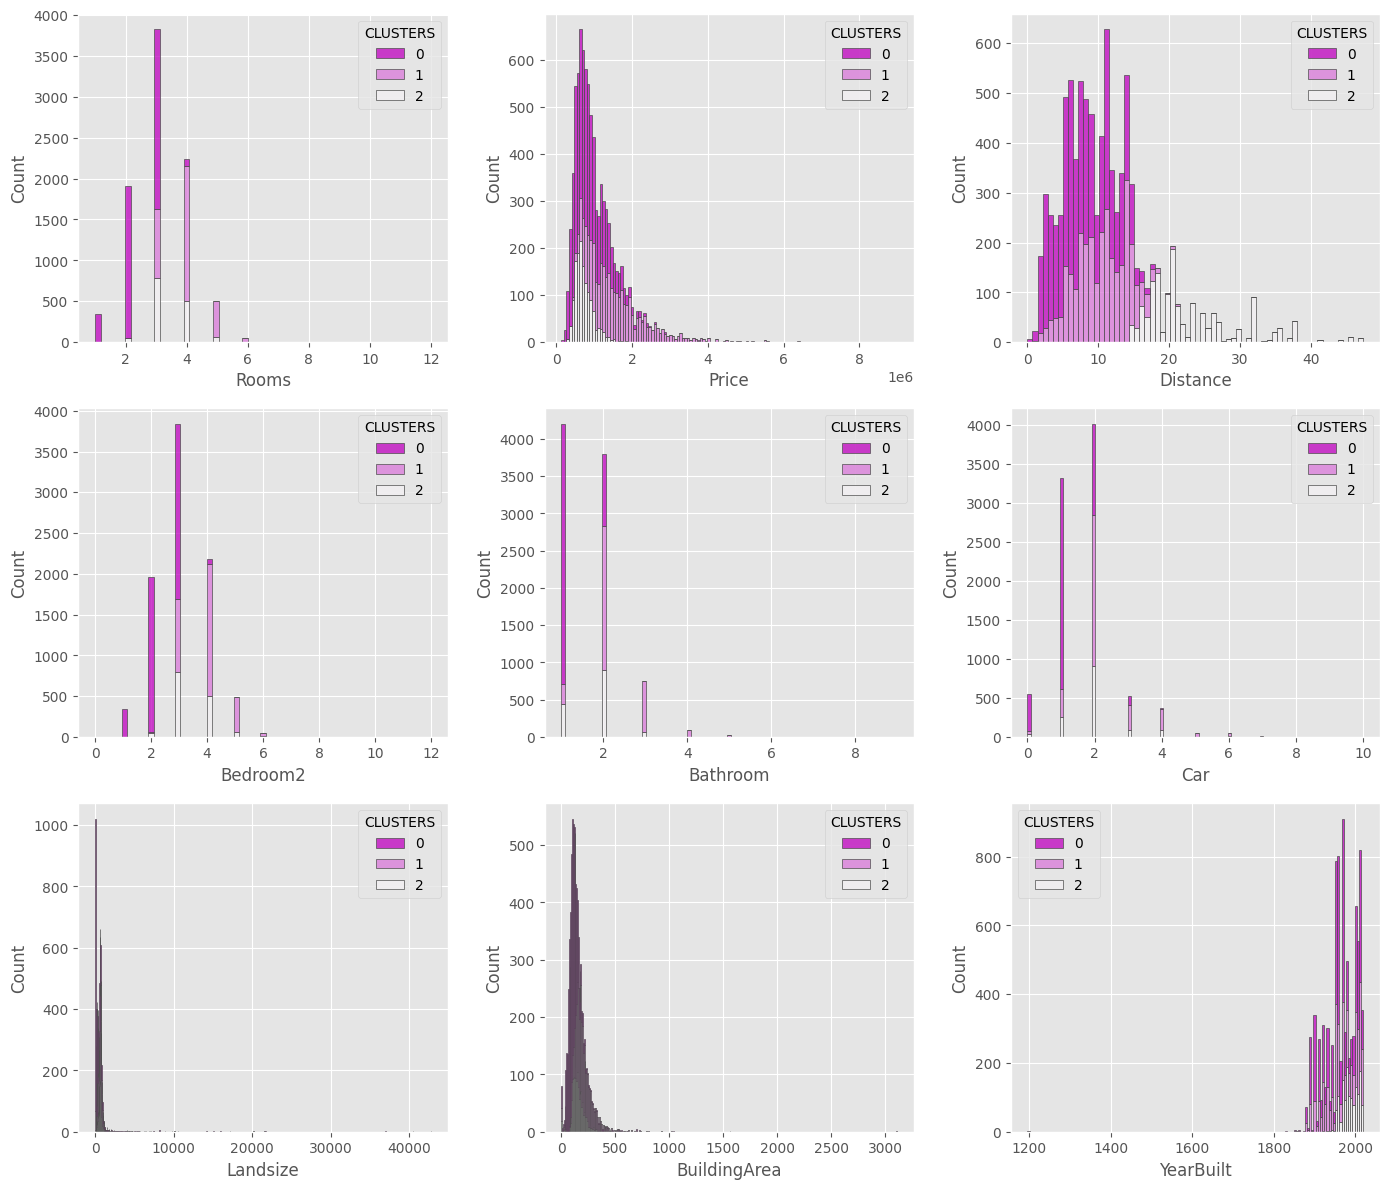

In [ ]:
plt.figure(1 , figsize = (14 , 12))
n = 0
for i in ["Rooms","Price",
                        "Distance","Bedroom2",
                        "Bathroom","Car",
                        "Landsize","BuildingArea",
                        "YearBuilt"]:

    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(houses_data,x=houses_data[i], hue=houses_data['CLUSTERS'],multiple="stack",
                  palette="light:m_r", edgecolor=".3",linewidth=.5)


plt.tight_layout()
plt.show()

In [ ]:
y[:10]

2     h
4     h
6     h
11    h
14    h
18    h
24    h
25    u
30    h
32    h
Name: Type, dtype: object

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(y)


In [ ]:
true_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0])

In [ ]:
label_encoder.classes_

array(['h', 't', 'u'], dtype=object)

In [ ]:
n_clusters = len(label_encoder.classes_)

In [221]:
comp = pd.DataFrame({'Actual': np.round(true_labels, 2),
                   'Predicted': np.round(Final_Model, 2)})
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Actual     8887 non-null   int64
 1   Predicted  8887 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 104.3 KB


In [222]:
combdata4 = pd.DataFrame({'Predicted': np.round(Final_Model, 2),
                   'Suburbs': houses_data.Suburb})


In [224]:
# Get Frequency of multiple columns
#print(combdata4[['Predicted','Suburbs']].value_counts())
# Using GroupBy.count() frequency value
df411 = combdata4.groupby('Predicted').count()
print(df411)

           Suburbs
Predicted         
0             4468
1             3006
2             1413


In [226]:
combdata4['freq_count'] = combdata4.groupby('Predicted')['Predicted'].transform('count')
print(combdata4)

       Predicted     Suburbs  freq_count
2              0  Abbotsford        4468
4              0  Abbotsford        4468
6              0  Abbotsford        4468
11             0  Abbotsford        4468
14             0  Abbotsford        4468
...          ...         ...         ...
34847          2     Wollert        1413
34849          2     Wollert        1413
34853          0  Yarraville        4468
34854          0  Yarraville        4468
34856          0  Yarraville        4468

[8887 rows x 3 columns]


#Conclusion
A model's performance is the reflection of the quality of the data feed to it. EDA section of this dataset provides a list of insights. Effect of normalization and standardization is massive on model performance.

Feature engineering is pivotal! For feature combination & PCA data, complexity of methods to achieve it is clearly visible. These processes highlight the various options open and thus requires us to be sensible in choosing the methods depending on the data and the problem statement.

K-Means Clustering, Hierarchical Clustering and DBSCAN Clustering are fundamentally different. They are based on different principles, thus displaying the difference in the model performances. Overall the model performances are not as great.